In [1]:
# import basics first.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

# Part 1, getting a data

In [2]:
# read train.csv file
house = pd.read_csv("train.csv")

In [3]:
# Explore data
house.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


## For classification, I will not use outliers because it is hard to define on the graph because this is a categorical data. Pre-determining abnormal/normal on selected points can harm my models.

In [4]:
# Select features and target.
X = house.drop('Sale Condition', axis=1)
y = house['Sale Condition'].map(lambda x: 1 if x == 'Abnorml' else 0)

# Part 2, Train and Test Split

In [5]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1374, 81) (677, 81) (1374,) (677,)


# Part 3, EDA

In [8]:
# Check y(sale condition) column.
y_train.value_counts()

0    1292
1      82
Name: Sale Condition, dtype: int64

In [9]:
# I will concat x and y for EDA. 
# Moreover, I need to drop some of missing values row.
# And I will drop those rows on my target(y) as well. 
# SO, I will re-assign X and y when all missing values treatment is done
# concat two training datas to proceed EDA
house_train = pd.concat([X_train, y_train], axis=1)

# concat X and y test data 

house_test = pd.concat([X_test, y_test], axis=1)

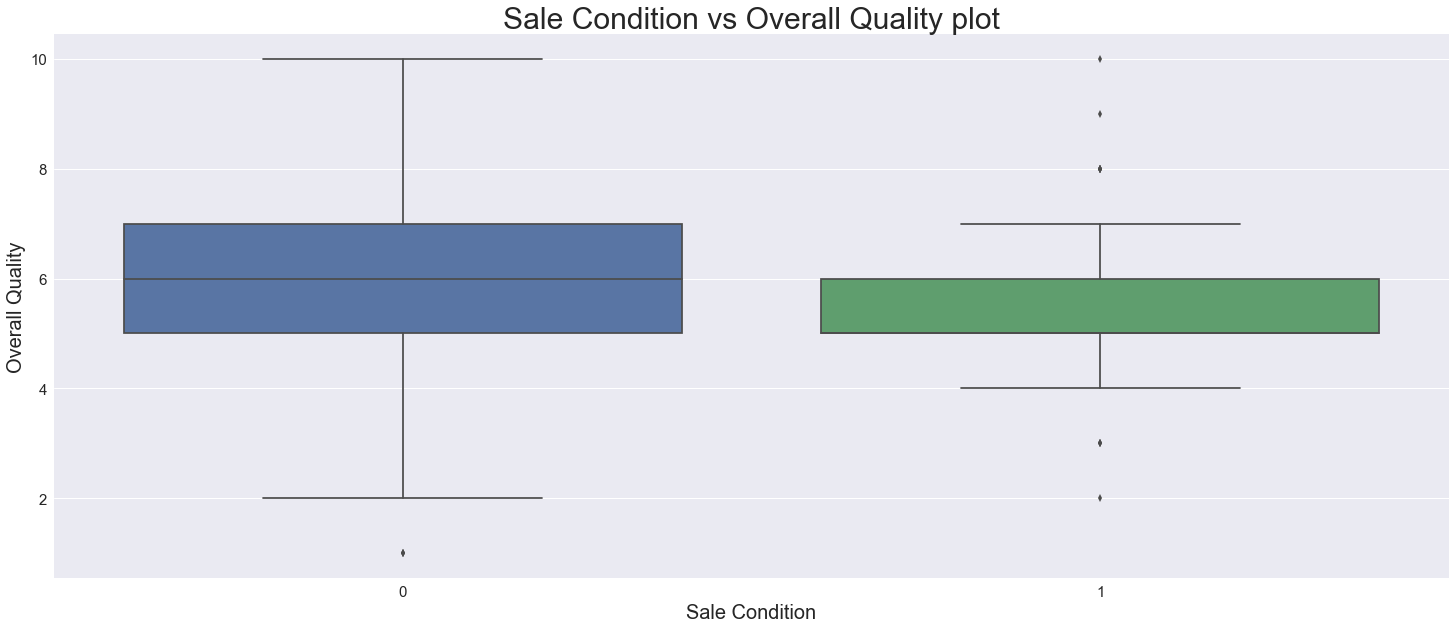

In [10]:
# Check Sale condition difference by sale price
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x='Sale Condition', y="Overall Qual", data=house_train)

ax.set_title("Sale Condition vs Overall Quality plot", fontdict={'fontsize': 30})
ax.set_ylabel('Overall Quality', fontdict={'fontsize': 20})
ax.set_xlabel('Sale Condition', fontdict={'fontsize': 20})
ax.tick_params(labelsize=15)

In [11]:
house_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Sale Condition
353,158,535353190,50,RL,78.0,17503,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,5,1948,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,546,0,1458,0.0,1.0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1948.0,Unf,1.0,330.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,97500,1
1723,279,908103350,80,RL,65.0,6305,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,6,1975,1975,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,528.0,Unf,0.0,480.0,1008.0,GasA,TA,Y,SBrkr,1096,0,0,1096,1.0,0.0,1,0,3,1,TA,5,Typ,1,Fa,Detchd,1975.0,Unf,1.0,352.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,125200,0
1834,32,527451410,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,ImStucc,BrkFace,381.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,525.0,525.0,GasA,TA,Y,SBrkr,525,567,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1971.0,Unf,1.0,264.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,88000,0
1660,1449,907202190,20,RL,NaN,9216,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1975,Gable,CompShg,HdBoard,HdBoard,BrkFace,176.0,TA,TA,CBlock,TA,TA,Av,ALQ,294.0,Unf,0.0,782.0,1076.0,GasA,TA,Y,SBrkr,1076,0,0,1076,0.0,0.0,1,1,3,1,TA,5,Typ,1,Fa,Detchd,1985.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,9,2008,WD,143195,1
1198,2079,905426010,20,RL,84.0,12615,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,7,1950,2001,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,Gd,Av,ALQ,477.0,Unf,0.0,725.0,1202.0,GasA,TA,Y,SBrkr,2158,0,0,2158,1.0,0.0,2,0,4,1,Gd,7,Typ,1,Gd,Attchd,1950.0,Unf,2.0,576.0,TA,TA,Y,0,29,39,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,243000,0


In [12]:
# change some of quality & condition grading to numerics 
def qual_cond_dict(x):
    if x =='Ex':
        return 5
    elif x == 'Gd':
        return 4
    elif x == 'TA':
        return 3
    elif x == 'Fa':
        return 2
    elif x == 'Po':
        return 1
    elif x == 'NA':
        return 0
    else :
        return x

In [13]:
# Apply to all datas
house_train = house_train.applymap(qual_cond_dict)
house_test = house_test.applymap(qual_cond_dict)

In [14]:
# Check the correlation on all numerical columns
house_train.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Val,Mo Sold,Yr Sold,SalePrice,Sale Condition
Id,1.000000,0.169355,0.005659,-0.023001,0.046103,-0.063392,-0.034881,-0.069495,-0.102295,-0.007541,-0.073289,-0.008947,-0.060700,0.016133,-0.050557,0.010515,0.023363,-0.025869,-0.020440,-0.009104,-0.024626,0.013969,-0.026558,-0.063018,0.036139,-0.045658,-0.056892,0.007323,-0.012971,-0.058731,-0.020197,-0.013333,0.026775,-0.076141,-0.048393,-0.050737,-0.041510,-0.055339,-0.044106,0.000135,0.021262,-0.032849,0.028444,0.054205,-0.430320,-0.022402,0.118883,-0.974832,-0.043316,0.043717
PID,0.169355,1.000000,-0.007666,-0.068182,0.048780,-0.283633,0.107669,-0.365061,-0.189001,-0.242087,-0.234432,0.034893,-0.218117,-0.100250,-0.081501,0.010844,-0.110752,-0.186050,-0.098929,-0.129295,-0.008663,0.080274,-0.100776,-0.022853,0.011104,-0.179818,-0.158578,0.031061,0.082886,-0.206133,-0.072877,-0.108538,0.008737,-0.273491,-0.237490,-0.200236,-0.132994,-0.126198,-0.003329,-0.096091,0.139955,-0.033202,-0.056735,0.024989,0.908100,-0.003106,-0.038788,0.018868,-0.255834,0.051834
MS SubClass,0.005659,-0.007666,1.000000,-0.411929,-0.240969,0.069187,-0.056785,0.061813,0.064255,-0.015254,0.045777,-0.041454,0.124024,-0.001672,-0.067000,-0.040889,-0.137511,-0.215867,0.008933,-0.244839,0.314533,0.045374,0.078228,0.015605,-0.012586,0.157192,0.202124,-0.015239,0.229652,0.029117,0.027491,-0.030152,-0.063268,0.114793,-0.020930,-0.073494,0.033388,0.011544,0.008429,-0.018418,-0.037258,-0.038257,-0.034361,-0.003476,0.645179,-0.021532,0.033566,-0.010856,-0.060650,-0.005977
Lot Frontage,-0.023001,-0.068182,-0.411929,1.000000,0.593938,0.177913,-0.043521,0.099149,0.076293,0.225322,0.134898,-0.029338,0.144153,0.061031,0.222242,0.030641,0.128339,0.356547,0.077719,0.484695,0.008578,0.004026,0.399014,0.106209,-0.038669,0.137844,0.038026,0.208805,-0.009719,0.163556,0.370168,0.277749,0.069672,0.059853,0.285840,0.359867,0.065133,0.067478,0.123466,0.214505,0.000696,0.045028,0.090285,0.200870,0.546742,0.066495,-0.023936,0.010355,0.330722,-0.003030
Lot Area,0.046103,0.048780,-0.240969,0.593938,1.000000,0.094929,-0.005146,0.025424,0.062284,0.176025,0.084180,0.017209,0.105952,0.053780,0.212743,0.036040,0.047662,0.278325,0.014718,0.381721,0.034092,-0.001418,0.331054,0.102282,0.058716,0.128202,0.040827,0.145372,-0.014935,0.112254,0.241883,0.304827,0.003087,0.007545,0.195315,0.249058,0.063802,0.033128,0.148110,0.168721,0.005510,0.019026,0.062557,0.138365,0.367490,0.104916,-0.011391,-0.040379,0.279805,-0.019595
Overall Qual,-0.063392,-0.283633,0.069187,0.177913,0.094929,1.000000,-0.063329,0.595281,0.585947,0.444361,0.726671,0.016217,0.671108,0.196863,0.297403,-0.015276,0.246480,0.536962,0.463918,0.460435,0.223892,-0.059010,0.548097,0.185270,-0.031741,0.501571,0.269419,0.035613,-0.169519,0.686540,0.367192,0.382153,0.275620,0.585419,0.581338,0.560909,0.218522,0.167117,0.255737,0.319681,-0.153166,0.053493,0.064980,0.004043,0.240990,0.036728,0.016464,-0.014075,0.792363,-0.113875
Overall Cond,-0.034881,0.107669,-0.056785,-0.043521,-0.005146,-0.063329,1.000000,-0.360067,0.038800,-0.134329,-0.132360,0.405931,-0.281331,0.121741,-0.044604,0.056747,-0.130876,-0.150281,0.031580,-0.131343,0.024921,0.011170,-0.081600,-0.034687,0.088093,-0.215793,-0.084802,0.000610,-0.103430,-0.026068,-0.066111,0.013155,-0.034045,-0.329126,-0.154237,-0.125385,0.012088,0.037867,0.033874,-0.070562,0.109552,-0.001564,0.049627,0.011633,0.332182,0.016443,-0.004554,0.059081,-0.072194,-0.064962
Year Built,-0.069495,-0.365061,0.061813,0.09914

In [15]:
# For MSSubClass, Yr sold, Mo Sold, I change types of columns to object 
# because number are either coded numbers and does not mean of numerical values.

house_train['MS SubClass'] = house_train['MS SubClass'].astype(str)
house_test['MS SubClass'] = house_test['MS SubClass'].astype(str)

house_train['Yr Sold'] = house_train['Yr Sold'].astype(str)
house_test['Yr Sold'] = house_test['Yr Sold'].astype(str)

house_train['Mo Sold'] = house_train['Mo Sold'].astype(str)
house_test['Mo Sold'] = house_test['Mo Sold'].astype(str)



### Missing values

In [16]:
# check the missing values
X_train.isnull().sum()[X_train.isnull().sum() > 0].sort_values(ascending=False)

Pool QC           1368
Misc Feature      1332
Alley             1280
Fence             1103
Fireplace Qu       660
Lot Frontage       229
Garage Yr Blt       75
Garage Finish       75
Garage Cond         75
Garage Qual         75
Garage Type         75
Bsmt Exposure       39
BsmtFin Type 2      38
BsmtFin Type 1      37
Bsmt Cond           37
Bsmt Qual           37
Mas Vnr Area        12
Mas Vnr Type        12
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Total Bsmt SF        1
Bsmt Unf SF          1
dtype: int64

For missing values, I will fill "None" because there are no features on there, and '0' and numerical columns.

In [17]:
# Use for loop, to fill missing values
for col in ['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature','Garage Type','Garage Finish',
            'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2','Mas Vnr Type']:
    house_train[col] = house_train[col].fillna("None")
    house_test[col] = house_test[col].fillna("None")
    

for col in ['Garage Yr Blt', 'Garage Qual', 'Garage Cond', 'Garage Cars', 'Garage Area','Bsmt Qual','Bsmt Cond',
            'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Mas Vnr Area']:
    house_train[col] = house_train[col].fillna(0)
    house_test[col] = house_test[col].fillna(0)

In [18]:
#for 'Lot Frontage', I choose median to fill the missing values 
# because mode is too low from mean and median is middle number from mean, mode, and median. 
# Moreover, I make groupby with neighborhood to make it more accurate.
# For remaining missing value, I will use median of Lot frontage total.
house_train['Lot Frontage'] = house_train.groupby('Neighborhood')['Lot Frontage'].transform(lambda x:x.fillna(x.median()))
house_train['Lot Frontage'].fillna(house_train['Lot Frontage'].median(), inplace=True)

house_test['Lot Frontage'] = house_test.groupby('Neighborhood')['Lot Frontage'].transform(lambda x:x.fillna(x.median()))
house_test['Lot Frontage'].fillna(house_test['Lot Frontage'].median(), inplace=True)

In [19]:
# check the missing value again.
house_train.isnull().sum()[house_train.isnull().sum() > 0]
house_test.isnull().sum()[house_test.isnull().sum() > 0]

Series([], dtype: int64)

In [20]:
# All other non-numerical columns, I made dummies
house_train = pd.get_dummies(house_train)
house_test = pd.get_dummies(house_test)

In [21]:
print(house_train.shape, house_test.shape)

(1374, 299) (677, 284)


In [22]:
house_train.columns

Index(['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       ...
       'Yr Sold_2010', 'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=299)

In [23]:
# Re-split train and test sets with X and y
X_train = house_train.drop(['SalePrice','Sale Condition','Id', 'PID'],axis=1)
y_train = house_train['Sale Condition']

X_test = house_test.drop(['SalePrice','Sale Condition','Id', 'PID'], axis=1)
y_test = house_test['Sale Condition']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1374, 295) (677, 280) (1374,) (677,)


In [24]:
# Select K best to check with features should I use to find abnormal sale condition.
from sklearn.feature_selection import SelectKBest

skb_lr = SelectKBest(k=50)


skb_lr.fit(X_train, y_train)

print(X_train.loc[:,skb_lr.get_support()].columns)


Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Exter Qual',
       'Bsmt Qual', 'Heating QC', 'Low Qual Fin SF', 'Full Bath', 'Half Bath',
       'Kitchen Qual', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'MS SubClass_60', 'MS Zoning_C (all)',
       'Alley_Grvl', 'Alley_None', 'Utilities_AllPub', 'Utilities_NoSeWa',
       'Neighborhood_IDOTRR', 'Neighborhood_OldTown', 'House Style_2.5Fin',
       'Exterior 1st_Stone', 'Exterior 2nd_CBlock', 'Mas Vnr Type_BrkCmn',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtFin Type 1_GLQ',
       'BsmtFin Type 1_Unf', 'Heating_Grav', 'Central Air_N', 'Central Air_Y',
       'Electrical_FuseA', 'Functional_Sal', 'Functional_Sev',
       'Fireplace Qu_4.0', 'Fireplace Qu_None', 'Garage Type_Attchd',
       'Garage Type_None', 'Garage Finish_Fin', 'Garage Finish_None',
       'Paved Drive_N', 'Fence_GdWo', 'Fence_None', 'Sale Type_COD',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],


In [25]:
# From K best choice, I choose some of features that are important.
sel_col = ['Overall Qual', 'Year Built', 'Year Remod/Add', 'Exter Qual',
       'Bsmt Qual', 'Heating QC', 'Low Qual Fin SF', 'Full Bath', 'Half Bath',
       'Kitchen Qual', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'MS SubClass_60', 'MS Zoning_C (all)',
       'Alley_Grvl', 'Alley_None', 'Lot Shape_Reg', 'Neighborhood_IDOTRR',
       'Neighborhood_OldTown', 'House Style_2.5Fin', 'Gr Liv Area','1st Flr SF','Lot Area', 'BsmtFin SF 1',
       'Roof Matl_WdShake', 'Mas Vnr Type_BrkCmn',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtFin Type 1_GLQ',
       'BsmtFin Type 1_Unf', 'Heating_Grav', 'Central Air_N', 'Central Air_Y',
       'Electrical_FuseA', 'Fireplace Qu_4.0',
       'Fireplace Qu_None', 'Garage Type_Attchd', 'Garage Type_None',
       'Garage Finish_Fin', 'Garage Finish_None', 'Paved Drive_N',
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_None', 'Sale Type_COD',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD ']

In [26]:
# Only take selected features from X_train and X_test .

X_train = X_train[sel_col]
X_test = X_test[sel_col]

In [27]:
# Change scales for X_train and X_test
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)

# Part 4 Modeling

In [28]:
# Check the baseline
# What's the baseline for the accuracy?
y_train.value_counts()/len(y_train)

0    0.94032
1    0.05968
Name: Sale Condition, dtype: float64

In [29]:
# baseline is 94.0%

In [30]:
# First, I use logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr_params = {
    'penalty':['l1','l2'],
    'C':np.logspace(-6, 2, 40),
    'solver':['liblinear']
}

lr_model = GridSearchCV(lr, lr_params, cv=20, n_jobs=-1)
lr_model.fit(Xs_train, y_train)
print(lr_model.best_params_)
print(lr_model.best_score_)
print('test score', lr_model.score(Xs_test, y_test))

{'C': 0.052233450742668434, 'penalty': 'l2', 'solver': 'liblinear'}
0.94250363901
test score 0.921713441654


In [31]:
# Second, I use KNN.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_dict = {
    'n_neighbors':list(range(1,51)),
    'weights':['distance','uniform']
}

knn_model = GridSearchCV(knn, knn_dict, cv=20, n_jobs=-1)
knn_model.fit(Xs_train, y_train)
print(knn_model.best_params_)
print(knn_model.best_score_)
print('test score', knn_model.score(Xs_test, y_test))

{'n_neighbors': 14, 'weights': 'distance'}
0.941048034934
test score 0.926144756278


In [32]:
# Third, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc_params = {
    'n_estimators': range(10, 200, 50),
    'max_depth': range(2,5),
    'max_features': ['auto', 'log2', None]
    
}
gbc_model = GridSearchCV(gbc, param_grid=gbc_params, cv=20, n_jobs=-1)
gbc_model.fit(Xs_train, y_train)
print('best score', gbc_model.best_score_)
print('best param', gbc_model.best_params_)
print('test score', gbc_model.score(Xs_test, y_test))

best score 0.944687045124
best param {'max_depth': 3, 'max_features': None, 'n_estimators': 10}
test score 0.923190546529


In [33]:
# AdaBoostClassifier
ada = AdaBoostClassifier()
ada_params = {
    'n_estimators' : range(10, 200, 50)
}
ada_model = GridSearchCV(ada, param_grid=ada_params, cv=20, n_jobs=-1)
ada_model.fit(Xs_train, y_train)
print('best score', ada_model.best_score_)
print('best param', ada_model.best_params_)
print('test score', ada_model.score(Xs_test, y_test))

best score 0.938864628821
best param {'n_estimators': 110}
test score 0.915805022157


In [34]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_params = {
    'max_depth': range(2,20),
    'max_features':['auto', 'log2', None]
}
dtc_model = GridSearchCV(dtc, param_grid=dtc_params, cv=20, n_jobs=-1)
dtc_model.fit(Xs_train, y_train)
print('best score', dtc_model.best_score_)
print('best param', dtc_model.best_params_)
print('test score', dtc_model.score(Xs_test, y_test))

best score 0.94250363901
best param {'max_depth': 2, 'max_features': None}
test score 0.924667651403


In [35]:
#SVC
from sklearn.svm import SVC

svc = SVC()
gamma_range = np.logspace(-5, 2, 20)
C_range = np.logspace(-2, 2, 10)
kernel_range = ['rbf', 'linear', 'poly']


param_grid = dict(C=C_range, kernel=kernel_range, gamma=gamma_range)

grid_svc = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_svc.fit(Xs_train, y_train)
print(grid_svc.best_params_)
print(grid_svc.best_score_)
print('test score', grid_svc.score(Xs_test, y_test))

{'C': 0.59948425031894093, 'gamma': 0.0088586679041008226, 'kernel': 'poly'}
0.944687045124
test score 0.924667651403


After several trials, I use KNN, and GradientBoosting Classifier to apply on test data.

# Final data

In [36]:
test = pd.read_csv('test.csv')
test.shape

(879, 80)

In [37]:
submission= pd.DataFrame()
submission['Id'] = test.Id

In [38]:
# Do samething to test set just like what I did on X_test.

In [39]:
def qual_cond_dict(x):
    if x =='Ex':
        return 5
    elif x == 'Gd':
        return 4
    elif x == 'TA':
        return 3
    elif x == 'Fa':
        return 2
    elif x == 'Po':
        return 1
    elif x == 'NA':
        return 0
    else :
        return x

In [40]:
test = test.applymap(qual_cond_dict)

In [41]:
test['MS SubClass'] = test['MS SubClass'].astype(str)
test['Yr Sold'] = test['Yr Sold'].astype(str)
test['Mo Sold'] = test['Mo Sold'].astype(str)

In [42]:
for col in ['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature','Garage Type','Garage Finish',
            'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2','Mas Vnr Type']:
    test[col] = test[col].fillna("None")
    

for col in ['Garage Yr Blt', 'Garage Qual', 'Garage Cond', 'Garage Cars', 'Garage Area','Bsmt Qual','Bsmt Cond',
            'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Mas Vnr Area']:
    test[col] = test[col].fillna(0)

In [43]:
test['Lot Frontage'] = test.groupby('Neighborhood')['Lot Frontage'].transform(lambda x:x.fillna(x.median()))
test['Lot Frontage'].fillna(test['Lot Frontage'].median(), inplace=True)

In [44]:
test = pd.get_dummies(test)

In [45]:
test = test[sel_col]

In [46]:
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

In [47]:
test.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Exter Qual',
       'Bsmt Qual', 'Heating QC', 'Low Qual Fin SF', 'Full Bath', 'Half Bath',
       'Kitchen Qual', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'MS SubClass_60', 'MS Zoning_C (all)',
       'Alley_Grvl', 'Alley_None', 'Lot Shape_Reg', 'Neighborhood_IDOTRR',
       'Neighborhood_OldTown', 'House Style_2.5Fin', 'Gr Liv Area',
       '1st Flr SF', 'Lot Area', 'BsmtFin SF 1', 'Roof Matl_WdShake',
       'Mas Vnr Type_BrkCmn', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_Unf', 'Heating_Grav',
       'Central Air_N', 'Central Air_Y', 'Electrical_FuseA',
       'Fireplace Qu_4.0', 'Fireplace Qu_None', 'Garage Type_Attchd',
       'Garage Type_None', 'Garage Finish_Fin', 'Garage Finish_None',
       'Paved Drive_N', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_None',
       'Sale Type_COD', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype

In [48]:
test_ss = ss.transform(test)

In [49]:
final_pred = knn_model.predict(test_ss)

In [50]:
submission['Sale Condition'] = final_pred
submission.head()

,Id,Sale Condition
0,2658,0
1,2718,0
2,2414,0
3,1989,0
4,625,0


In [51]:
submission.to_csv('submission_classification_knn_model.csv', index=False)